In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [4]:
df = pd.read_csv('Data_after_rainfall.csv')
print(df)

            State_Name   Crop_Type          Crop  rainfall  Area_in_hectares   
0       andhra pradesh      kharif     Arhar/Tur    654.34           21400.0  \
1       andhra pradesh      kharif         Bajra    654.34            1400.0   
2       andhra pradesh      kharif   Castor seed    654.34            1000.0   
3       andhra pradesh      kharif  Cotton(lint)    654.34            7300.0   
4       andhra pradesh      kharif  Dry chillies    654.34            3700.0   
...                ...         ...           ...       ...               ...   
173050     west bengal      summer         Maize    182.50             258.0   
173051     west bengal      summer          Rice    182.50             105.0   
173052     west bengal  whole year     Sugarcane   1501.98             303.0   
173053     west bengal        rabi          Rice    152.54          152676.0   
173054     west bengal        rabi       Sesamum    152.54             244.0   

        Production_in_tons  Yield_ton_p

In [5]:
df.head()

,State_Name,Crop_Type,Crop,rainfall,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,andhra pradesh,kharif,Arhar/Tur,654.34,21400.0,2600.0,0.121495
1,andhra pradesh,kharif,Bajra,654.34,1400.0,500.0,0.357143
2,andhra pradesh,kharif,Castor seed,654.34,1000.0,100.0,0.100000
3,andhra pradesh,kharif,Cotton(lint),654.34,7300.0,9400.0,1.287671
4,andhra pradesh,kharif,Dry chillies,654.34,3700.0,7100.0,1.918919


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173055 entries, 0 to 173054
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State_Name          173055 non-null  object 
 1   Crop_Type           173055 non-null  object 
 2   Crop                173055 non-null  object 
 3   rainfall            173055 non-null  float64
 4   Area_in_hectares    173055 non-null  float64
 5   Production_in_tons  173055 non-null  float64
 6   Yield_ton_per_hec   173055 non-null  float64
dtypes: float64(4), object(3)
memory usage: 9.2+ MB


In [7]:
df.shape

(173055, 7)

In [8]:
print(df.isnull().sum())

State_Name            0
Crop_Type             0
Crop                  0
rainfall              0
Area_in_hectares      0
Production_in_tons    0
Yield_ton_per_hec     0
dtype: int64


In [9]:
df.nunique()

State_Name                33
Crop_Type                  4
Crop                     114
rainfall                 111
Area_in_hectares       33289
Production_in_tons     42231
Yield_ton_per_hec     114325
dtype: int64

In [10]:
df.describe()

,rainfall,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
count,173055.000000,1.730550e+05,1.730550e+05,173055.000000
mean,684.299979,1.360691e+04,4.910903e+04,4.747486
std,585.969504,5.669579e+04,4.038714e+05,31.624296
min,3.274569,2.000000e-01,0.000000e+00,0.000000
25%,152.540000,1.200000e+02,1.170000e+02,0.500620
50%,579.750000,8.310000e+02,9.790000e+02,0.985765
75%,1037.320000,5.798500e+03,8.420000e+03,2.243999
max,3322.060000,8.580100e+06,3.715800e+07,9801.000000


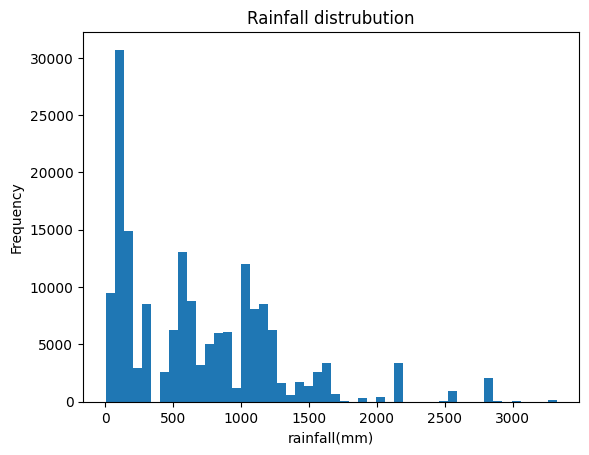

In [11]:
df['rainfall'].plot(kind='hist', bins=50, title="Rainfall distrubution")
plt.xlabel('rainfall(mm)')
plt.show()

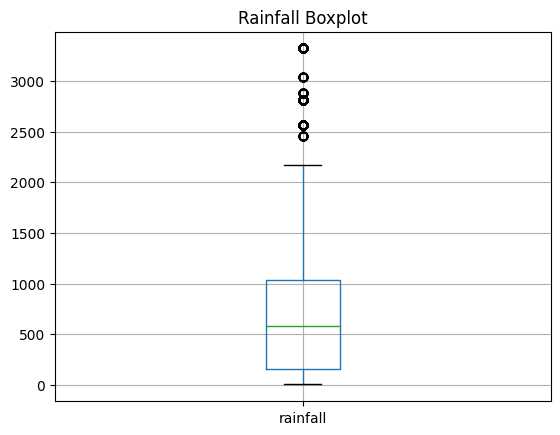

In [12]:
df.boxplot(column='rainfall')
plt.title("Rainfall Boxplot")
plt.show()

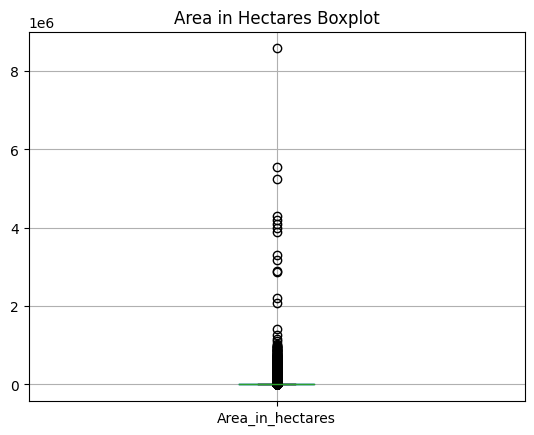

In [13]:
df.boxplot(column='Area_in_hectares')
plt.title('Area in Hectares Boxplot')
plt.show()

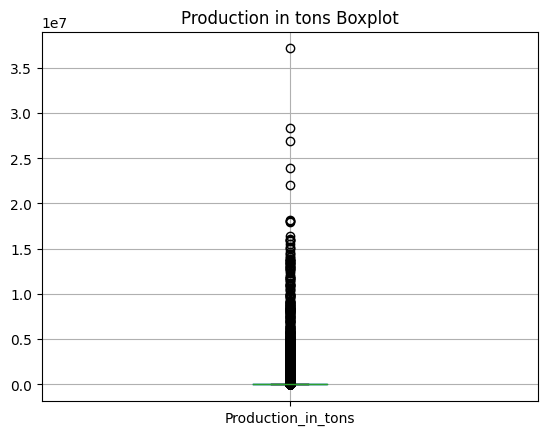

In [14]:
df.boxplot(column=('Production_in_tons'))
plt.title("Production in tons Boxplot")
plt.show()

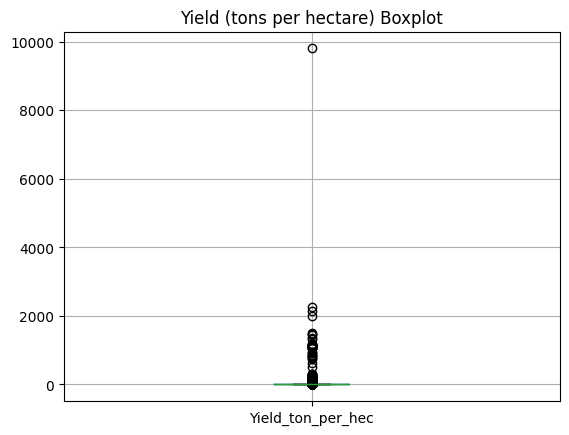

In [15]:
df.boxplot(column='Yield_ton_per_hec')
plt.title('Yield (tons per hectare) Boxplot')
plt.show()

In [16]:
mean_rainfall = df['rainfall'].mean()
median_rainfall = df['rainfall'].median()
std_rainfall = df['rainfall'].std()
range_rainfall = df['rainfall'].max() - df['rainfall'].min()

print(f"Mean Rainfall: {mean_rainfall}")
print(f"Median Rainfall: {median_rainfall}")
print(f"Std Rainfall: {std_rainfall}")
print(f"Range Rainfall: {range_rainfall}")

Mean Rainfall: 684.2999788159718
Median Rainfall: 579.75
Std Rainfall: 585.9695037765763
Range Rainfall: 3318.7854309999993


In [17]:
skewness_rainfall = df['rainfall'].skew()
print(f"Skewness Rainfall: {skewness_rainfall}")

Skewness Rainfall: 1.152538296372017


In [18]:
kurtosis_Rainfall = df['rainfall'].kurt()
print(f"Kurtosis Rainfall: {kurtosis_Rainfall}")

Kurtosis Rainfall: 1.6726161649566702


In [19]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

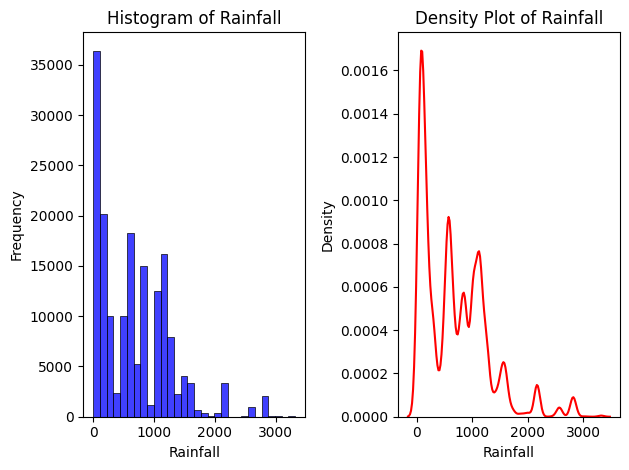

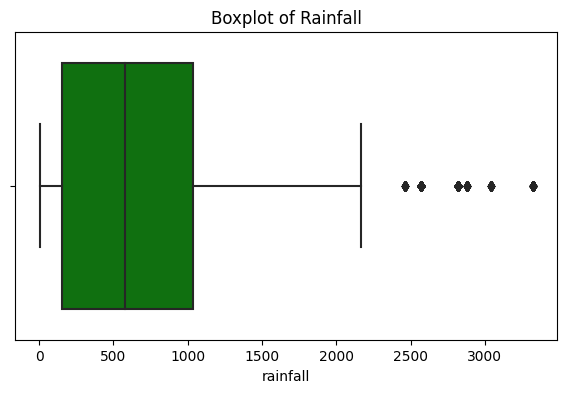

In [20]:
# Subplot 1
plt.subplot(1, 2, 1)
sns.histplot(df['rainfall'], kde=False, bins=30, color='blue')
plt.title('Histogram of Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')

# Subplot 2: Density Plot for Rainfall (to show kurtosis visually)
plt.subplot(1, 2, 2)
sns.kdeplot(df['rainfall'], color='red')
plt.title('Density Plot of Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# To also add a box plot for skewness detection:
plt.figure(figsize=(7, 4))
sns.boxplot(x=df['rainfall'], color='green')
plt.title('Boxplot of Rainfall')
plt.show()

In [21]:
missing_values = df.isnull().sum()
print(f"Missing values:\n{missing_values}")

Missing values:
State_Name            0
Crop_Type             0
Crop                  0
rainfall              0
Area_in_hectares      0
Production_in_tons    0
Yield_ton_per_hec     0
dtype: int64


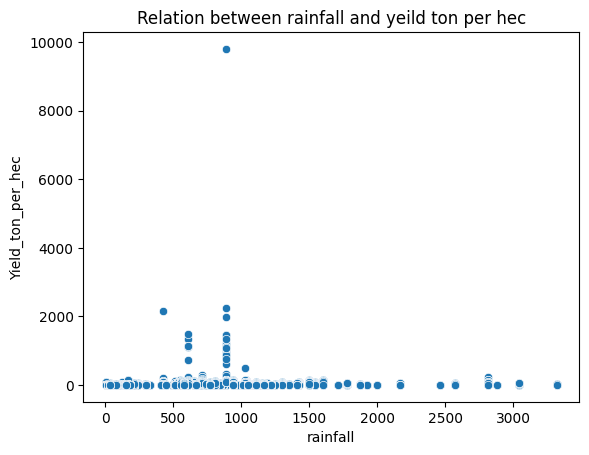

In [22]:
sns.scatterplot(data=df,x='rainfall',y='Yield_ton_per_hec')
plt.title("Relation between rainfall and yeild ton per hec")
plt.show()

In [23]:
df['Zscore_rainfall'] = zscore(df['rainfall'])
outliers = df[df['Zscore_rainfall'].abs()>3]
print(outliers[['rainfall', 'Area_in_hectares', 'Production_in_tons', 'Yield_ton_per_hec']])

        rainfall  Area_in_hectares  Production_in_tons  Yield_ton_per_hec
333      2569.52           5500.00             4450.00           0.809091
343      2569.52           3500.00             3625.00           1.035714
353      2569.52            683.00              645.00           0.944363
364      2569.52           3800.00             3800.00           1.000000
375      2569.52           7287.00             7250.00           0.994922
...          ...               ...                 ...                ...
166103   2817.86            623.42              502.01           0.805252
166104   2817.86           2673.44            19413.99           7.261801
166105   2817.86              2.47               17.60           7.125506
166106   2817.86           2265.10           118922.98          52.502309
166107   2817.86            160.81              516.14           3.209626

[3236 rows x 4 columns]
